**IUT d'Orléans - Année 2022-2023- 1A\
R207 Graphes**

# TP1: Introduction aux Graphes et à NetworkX

Dans ce tp, nous allons faire nos premiers pas avec des objets très utilisés en informatique: les *graphes*. Informellement, un graphe est un ensemble de points, appelés *sommets*. Ces sommets peuvent être reliés entre eux par des traits. Ces liens sont appelés des *arêtes*. 

Les graphes sont des outils extrémement appropriés pour représenter des relations entre entités (réseaux sociaux, de télécommunication, etc). De nombreux problèmes peuvent être modélisés par des problèmes de graphes (ordonnancement, calcul d'itinéraires, etc). 

Afin de manipuler des graphes, nous allons utiliser la bibliothèque **NetworkX** de Python. Nous allons voir les bases à connaitre mais les possibilités sont immenses. N'hésitez pas à aller regarder le manuel (https://networkx.org/documentation/stable/index.html) pour plus d'information.

## Premiers pas avec NetworkX

Tout d'abord, nous allons devoir importer cette bibliothèque.

In [2]:
import networkx as nx

Une fois l'importation réalisée, nous allons pouvoir créer notre premier graphe.

In [3]:
G = nx.Graph()

Et voila! Il est maintenant possible d'accèder à la liste des sommets et des arêtes de ce graphe en utilisant les attributs `G.nodes` et `G.edges` qui sont des vues. Regardons ce que contiennent ces vues.

In [4]:
print(G.nodes,G.edges)

[] []


Naturellement, un graphe fraichement créé est vide et ne contient ni sommet ni arête... Pour ajouter une arête, il faut utiliser la méthode `add_edge(node_1,node_2)` où `node_1` et `node_2` représentent les labels des deux sommets que l'on veut relier par une arête. Si ces sommets n'existent pas déjà dans le graphe, ils seront créés.

1. Ajoutez une arête entre deux sommets de label "s1" et "s2" puis affichez la liste des sommets et des arêtes.

In [5]:
G.add_edge("s1", "s2")
print(G.nodes,G.edges)

['s1', 's2'] [('s1', 's2')]


Il est également possible d'ajouter uniquement un sommet, sans forcément le lier avec un autre sommet. La méthode pour faire cela est `add_node(new_node)`. 

2. Essayez de rajouter un noeud avec le label "s3" à `G`. Connectez ensuite "s3" aux deux autres sommets.

In [6]:
G.add_node("s3")
print(G.nodes,G.edges)


['s1', 's2', 's3'] [('s1', 's2')]


In [8]:
G.add_edge("s1", "s3")
G.add_edge("s2", "s3")
print(G.nodes,G.edges)

['s1', 's2', 's3'] [('s1', 's2'), ('s1', 's3'), ('s2', 's3')]


Vous êtes maintenant capable de créer un graphe en python!

## Accéder aux éléments d'un graphe NetworkX

Nous avons vu qu'il est possible d'accéder à une vue des sommets et des arêtes du graphe. Ces vues fonctionnent un peu comme des dictionnaires en python: la clé correspond au label et la valeur correspond aux attributs. Il existe d'autres vues comme `G.adj` qui correspond à la liste d'adjacence du graphe ou encore `G.degree` qui correspond aux degrés des sommets du graphe.

3. Afficher les voisins de s1 puis le degré de s3.

In [11]:
G.adj
G.degree

DegreeView({'s1': 2, 's2': 2, 's3': 2})

## Dessiner des graphes avec NetworkX

La bibliothèque NetworkX propose également de faire l'interface avec le module `pyplot` de la biliothèque **Matplotlib** afin de pouvoir afficher les graphes. Voici un exemple minimal: 

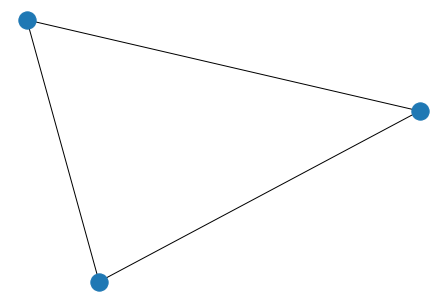

In [26]:
import matplotlib.pyplot as plt

nx.draw(G)

Si l'affichage ne fonctionne pas, il faudra peut-être rajouter la ligne plt.show() après avoir dessiner le graphe. De nombreux paramétrages sont possibles lors du dessin, comme la couleur des sommets et des arêtes ou encore la manière dont le graphe sera dessiné.

## Tournoi de football

Le graphe suivant représente le déroulement d'un tournoi de football, c'est-à-dire que chaque sommet du graphe représente une équipe de football et chaque arête correspond à une rencontre entre deux équipes.
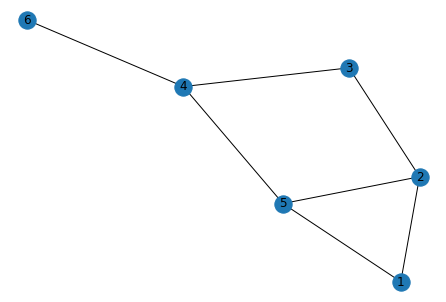

1. Ecrire les lignes de codes qui permettent d’afficher ce graphe.

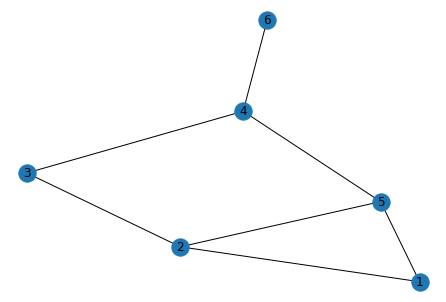

In [42]:
I = nx.Graph()
I.add_edge("s1","s2")
I.add_node("s5")
I.add_edge("s1", "s5")
I.add_edge("s2", "s5")
I.add_edge("s4", "s3")
I.add_edge("s5", "s4")
I.add_edge("s3", "s2")
I.add_node("s6")
I.add_edge("s6", "s3")

tournoi = nx.Graph()
for i in range(1,7):
    tournoi.add_node(i)
tournoi.add_edges_from([(1,2),(1,5),(2,5),(5,4),(2,3),(3,4),(4,6)])
nx.draw(tournoi, with_labels=True)

2. L’équipe 1 ne rencontrera finalement pas l’équipe 2 mais l’équipe 6 et l’équipe 2 affrontera une nouvelle équipe 7. Afficher la nouvelle organisation du tournoi. Afficher la liste des équipes qui affronteront l’équipe 5.

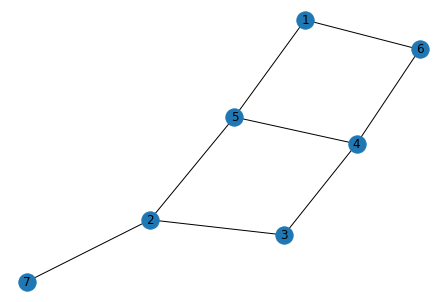

In [43]:
tournoi.remove_edge(1, 2)
tournoi.add_edge(1,6)
tournoi.add_edge(2, 7)
nx.draw(tournoi, with_labels=True)

3. Quelle structure de données utiliser pour associer à chaque équipe l’ensemble de ses joueurs et leur numéro ?

In [ ]:
# un ensemble

4. Après le changement d'organisation de la question 2, en déduire le nombre de matchs que jouera l’équipe 4. L’équipe 5 affrontera-t-elle l’équipe 3 ? Combien y a-t-il de rencontres dans ce tournoi ? Ecrivez le code python permettant de répondre à ces questions.

In [60]:
len(tournoi.adj[4])
5 in tournoi.adj[3]
sommeMatch = 0
for match in tournoi.adj.values():
    sommeMatch+=len(match)
print(sommeMatch//2)
print(tournoi.adj)

8
{1: {5: {}, 6: {}}, 2: {5: {}, 3: {}, 7: {}}, 3: {2: {}, 4: {}}, 4: {5: {}, 3: {}, 6: {}}, 5: {1: {}, 2: {}, 4: {}}, 6: {4: {}, 1: {}}, 7: {2: {}}}


## Modélisation d'un labyrinthe

Considérons le labyrinthe suivant :

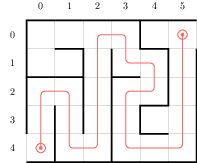

Chaque position dans le labyrinthe sera notée par L(i, j) où i désigne l’indice de ligne
et j l’indice de colonne. Avec ces notations, l’entrée du labyrinthe se situe donc en
L(4, 0) et la sortie en L(4, 5).

1. Est-il possible de se rendre de la case L(4,0) à la case L(4,1)? et de la case L(4,0) à la case L(3,0)?
1. Nous allons maintenant modéliser ce labyrinthe à l’aide d’un graphe. Que peut représenter l'ensemble des sommets? Quelle relation voudrait-on modéliser grâce aux arêtes? 
1. Implémenter le graphe représentant le labyrinthe en Python puis l'afficher. On pourra s'aider de la méthode `grid_2d_graph(n,m)` qui permet de générer une grille de hauteur n et de largeur m. La fonction `G.delete_edge(u1,u2)` qui supprime l'arête entre les sommets u1 et u2 si elle existe pourra également nous être utile. 

In [66]:

laby = nx.grid_2d_graph(5,6)
print(laby.nodes)
murs_verticaux = [(0,3), (1,1), (1,2), (1,4),(2,1), (2,2),(2,4),(3,0),(3,1),(3,2),(3,4),(4,0),(4,2)]
for (i, j) in murs_verticaux:
    laby.remove_edge((i,j),(i,j+1))
laby.adj
nx.draw(laby, pos=position, with_labels=True)
    
#positions = dict()
#for i in range(0,5):
#    for j in range(0,6):
#       positions[(i,j)] = 


[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5)]


NameError: name 'position' is not defined

In [ ]:
# il est possible d'aller en L(4,0), L(4,1), L(3,0)

4. Pour chaque position, afficher le nombre de directions possibles à prendre.